In [10]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from itertools import product
from transformers import BertTokenizer, AdamW
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler
from pys.functions import CustomBertModel, create_dataset
from pys.data import train_df, val_df, filtered_labels_at_least_5_list, label_mapping
from pys.params import num_epochs
%run decay_grid_search.ipynb

In [11]:
param_grid = {
    'learning_rate': [5e-5, 3e-5, 1e-5, 1e-3],
    'batch_size': [16, 32],
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [12]:
def plot(acc_train, acc_val, f1_train, f1_val, loss_train, loss_val, params):
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    
    epochs = range(1, num_epochs + 1)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))  

    axes[0].plot(epochs, acc_train, color='blue', linestyle='-', label='Train Accuracy')
    axes[0].plot(epochs, acc_val, color='red', linestyle='-', label='Validation Accuracy')
    axes[0].set_title('Accuracy Over Epochs')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy (%)')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].plot(epochs, f1_train, color='blue', linestyle='-', label='Train F1 Score')
    axes[1].plot(epochs, f1_val, color='red', linestyle='-', label='Validation F1 Score')
    axes[1].set_title('F1 Score Over Epochs')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('F1 Score')
    axes[1].legend()
    axes[1].grid(True)

    axes[2].plot(epochs, loss_train, color='blue', linestyle='-', label='Train Loss')
    axes[2].plot(epochs, loss_val, color='red', linestyle='-', label='Validation Loss')
    axes[2].set_title('Loss Over Epochs')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Loss')
    axes[2].legend()
    axes[2].grid(True)

    fig.suptitle(f"Training and Validation Metrics\n"
                 f"Learning Rate: {learning_rate}, Batch Size: {batch_size}", fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Training with params: {'learning_rate': 5e-05, 'batch_size': 16}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using ExponentialLR with gamma=0.9


c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.236362, Accuracy: 15.873016%, F1 Score: 0.083864
Validation Accuracy: 25.000000%, Validation F1 Score: 0.158333


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.065109, Accuracy: 25.396825%, F1 Score: 0.145517
Validation Accuracy: 25.000000%, Validation F1 Score: 0.116071


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.024172, Accuracy: 31.746032%, F1 Score: 0.231024
Validation Accuracy: 37.500000%, Validation F1 Score: 0.251578


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.890217, Accuracy: 36.507937%, F1 Score: 0.297404
Validation Accuracy: 43.750000%, Validation F1 Score: 0.332143


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.779435, Accuracy: 52.380952%, F1 Score: 0.435231
Validation Accuracy: 43.750000%, Validation F1 Score: 0.341270


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.654738, Accuracy: 55.555556%, F1 Score: 0.470504
Validation Accuracy: 50.000000%, Validation F1 Score: 0.390625
Using StepLR with step_size=2 and gamma=0.9


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 1.509146, Accuracy: 60.317460%, F1 Score: 0.509328
Validation Accuracy: 50.000000%, Validation F1 Score: 0.390625


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 1.364984, Accuracy: 71.428571%, F1 Score: 0.641809
Validation Accuracy: 56.250000%, Validation F1 Score: 0.435714


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 1.246169, Accuracy: 77.777778%, F1 Score: 0.731347
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.155904, Accuracy: 80.952381%, F1 Score: 0.769000
Validation Accuracy: 56.250000%, Validation F1 Score: 0.460714


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.031663, Accuracy: 80.952381%, F1 Score: 0.764355
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 0.953626, Accuracy: 79.365079%, F1 Score: 0.732319
Validation Accuracy: 62.500000%, Validation F1 Score: 0.526339
Using MultiStepLR with milestones=[1, 5] and gamma=0.1


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 0.826138, Accuracy: 90.476190%, F1 Score: 0.892227
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 0.818080, Accuracy: 88.888889%, F1 Score: 0.876871
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 0.798109, Accuracy: 90.476190%, F1 Score: 0.892227
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 0.789132, Accuracy: 88.888889%, F1 Score: 0.862736
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 0.774938, Accuracy: 87.301587%, F1 Score: 0.843771
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 0.758911, Accuracy: 90.476190%, F1 Score: 0.892227
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214
Using ReduceLROnPlateau with mode=max, factor=0.1, patience=2


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 0.762200, Accuracy: 85.714286%, F1 Score: 0.820566
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 0.782572, Accuracy: 92.063492%, F1 Score: 0.908855
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 0.769985, Accuracy: 88.888889%, F1 Score: 0.862736
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 0.759634, Accuracy: 90.476190%, F1 Score: 0.879365
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 0.762607, Accuracy: 88.888889%, F1 Score: 0.862736
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 0.768908, Accuracy: 84.126984%, F1 Score: 0.804160
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214
Using CosineAnnealingLR with T_max=50 and eta_min=1e-05


Training Epoch 1/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 0.765806, Accuracy: 88.888889%, F1 Score: 0.862736
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 2/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 0.768540, Accuracy: 88.888889%, F1 Score: 0.862736
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 3/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 0.773084, Accuracy: 90.476190%, F1 Score: 0.879365
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 4/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 0.780206, Accuracy: 92.063492%, F1 Score: 0.897744
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 5/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 0.784244, Accuracy: 87.301587%, F1 Score: 0.843771
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


Training Epoch 6/6:   0%|          | 0/4 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 0.738668, Accuracy: 90.476190%, F1 Score: 0.892227
Validation Accuracy: 56.250000%, Validation F1 Score: 0.448214


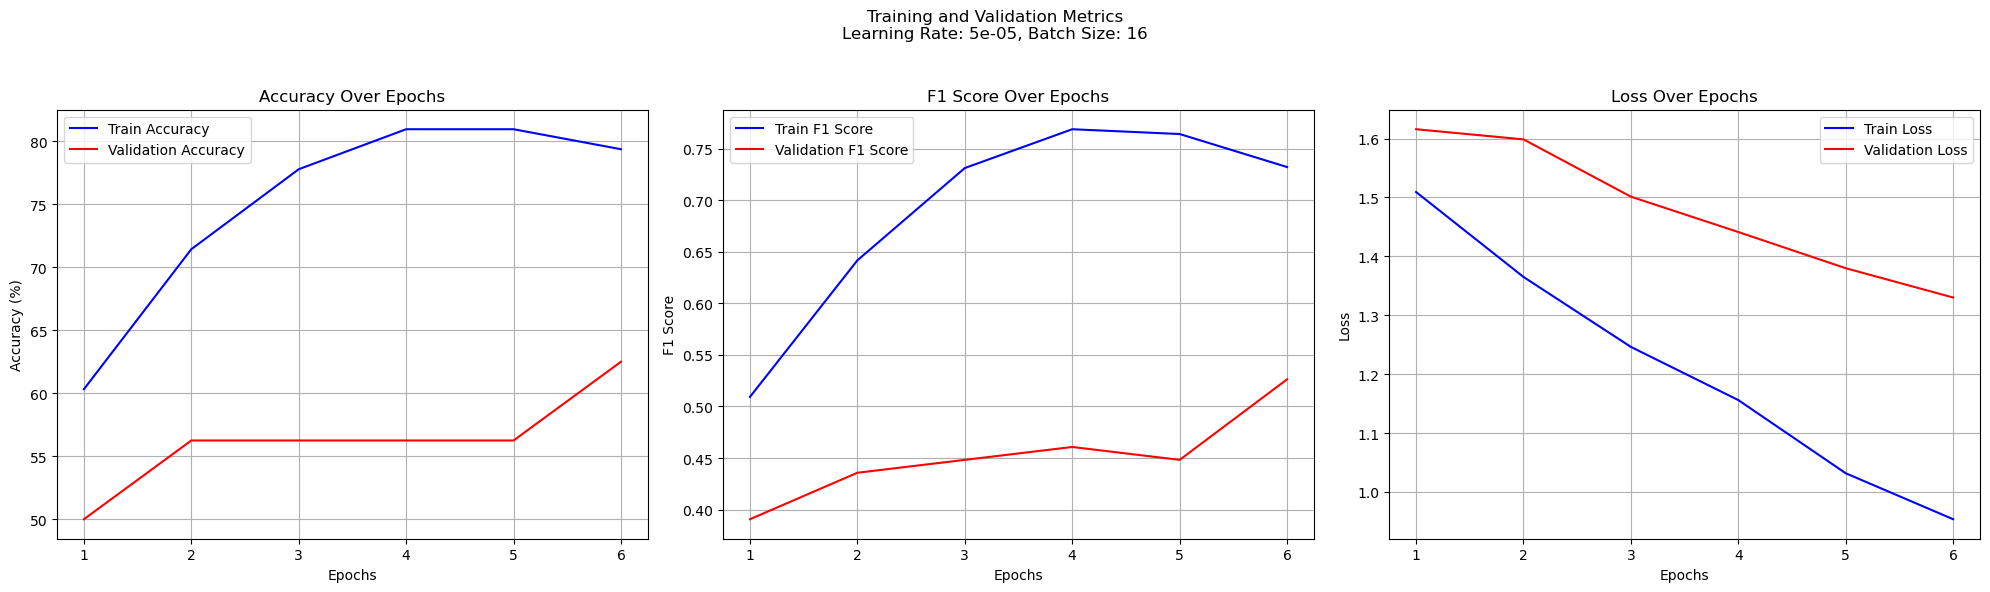

Training with params: {'learning_rate': 5e-05, 'batch_size': 32}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using ExponentialLR with gamma=0.9


c:\Users\tamar\anaconda3\envs\llm_env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 2.196994, Accuracy: 12.698413%, F1 Score: 0.057112
Validation Accuracy: 18.750000%, Validation F1 Score: 0.103571


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 2.126975, Accuracy: 19.047619%, F1 Score: 0.115600
Validation Accuracy: 31.250000%, Validation F1 Score: 0.180682


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 2.082924, Accuracy: 26.984127%, F1 Score: 0.204679
Validation Accuracy: 31.250000%, Validation F1 Score: 0.218750


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 2.022040, Accuracy: 38.095238%, F1 Score: 0.307974
Validation Accuracy: 18.750000%, Validation F1 Score: 0.123162


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.978597, Accuracy: 31.746032%, F1 Score: 0.253429
Validation Accuracy: 25.000000%, Validation F1 Score: 0.242857


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.951908, Accuracy: 46.031746%, F1 Score: 0.372307
Validation Accuracy: 31.250000%, Validation F1 Score: 0.290625
Using StepLR with step_size=2 and gamma=0.9


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 1.877397, Accuracy: 50.793651%, F1 Score: 0.415062
Validation Accuracy: 31.250000%, Validation F1 Score: 0.250000


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 1.818613, Accuracy: 57.142857%, F1 Score: 0.460049
Validation Accuracy: 37.500000%, Validation F1 Score: 0.285714


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 1.722390, Accuracy: 60.317460%, F1 Score: 0.517334
Validation Accuracy: 37.500000%, Validation F1 Score: 0.285714


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.646496, Accuracy: 66.666667%, F1 Score: 0.573243
Validation Accuracy: 43.750000%, Validation F1 Score: 0.348958


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.534286, Accuracy: 69.841270%, F1 Score: 0.616731
Validation Accuracy: 50.000000%, Validation F1 Score: 0.419048


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.424253, Accuracy: 82.539683%, F1 Score: 0.779861
Validation Accuracy: 56.250000%, Validation F1 Score: 0.530506
Using MultiStepLR with milestones=[1, 5] and gamma=0.1


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 1.317709, Accuracy: 87.301587%, F1 Score: 0.834719
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 1.276001, Accuracy: 92.063492%, F1 Score: 0.896649
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 1.260196, Accuracy: 88.888889%, F1 Score: 0.866940
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.219990, Accuracy: 90.476190%, F1 Score: 0.885979
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.229454, Accuracy: 90.476190%, F1 Score: 0.886556
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.214322, Accuracy: 88.888889%, F1 Score: 0.861347
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429
Using ReduceLROnPlateau with mode=max, factor=0.1, patience=2


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 1.224360, Accuracy: 90.476190%, F1 Score: 0.891066
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 1.209671, Accuracy: 85.714286%, F1 Score: 0.811772
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 1.223545, Accuracy: 85.714286%, F1 Score: 0.821126
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 4/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4, Loss: 1.198167, Accuracy: 90.476190%, F1 Score: 0.887348
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 5/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 5/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5, Loss: 1.203030, Accuracy: 85.714286%, F1 Score: 0.818233
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 6/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 6/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6, Loss: 1.212845, Accuracy: 90.476190%, F1 Score: 0.893109
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429
Using CosineAnnealingLR with T_max=50 and eta_min=1e-05


Training Epoch 1/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 1/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1, Loss: 1.217791, Accuracy: 85.714286%, F1 Score: 0.819518
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 2/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 2/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2, Loss: 1.214096, Accuracy: 90.476190%, F1 Score: 0.891883
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 3/6:   0%|          | 0/2 [00:00<?, ?it/s]

Validating Epoch 3/6:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3, Loss: 1.210527, Accuracy: 90.476190%, F1 Score: 0.886556
Validation Accuracy: 50.000000%, Validation F1 Score: 0.446429


Training Epoch 4/6:   0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
def grid_search(param_grid):
    best_f1 = float('-inf')
    best_params = None
    best_scheduler = None 
    best_scheduler_params = None
    
    grid_combinations = list(product(*param_grid.values()))
    
    train_dataset = create_dataset(train_df, tokenizer, label_mapping)
    val_dataset = create_dataset(val_df, tokenizer, label_mapping)
    
    
    for params in grid_combinations:
        current_params = dict(zip(param_grid.keys(), params))
        
        print(f"Training with params: {current_params}")
        
        learning_rate = current_params['learning_rate']
        batch_size = current_params['batch_size']
        
        model = CustomBertModel(num_labels=len(filtered_labels_at_least_5_list))
        optimizer = AdamW(model.parameters(), lr=learning_rate)
        model.to(device)

        train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
        val_loader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

        f1_train, f1_val, acc_train, acc_val, loss_train, loss_val, scheduler, scheduler_params = decay_lr_grid(model, train_loader, val_loader, optimizer, device, num_epochs)

        plot(acc_train, acc_val , f1_train, f1_val, loss_train, loss_val, current_params)
        
        if f1_val[-1] > best_f1:
            best_f1 = f1_val[-1]
            best_params = current_params
            best_scheduler = scheduler
            best_scheduler_params = scheduler_params
    
    print(f"Best F1 Score: {best_f1:.4f}")
    print(f"Best parameters: {best_params}")
    print(f"Best scheduler: {best_scheduler.__class__.__name__}")
    print(f"Best scheduler parameters: {best_scheduler_params}")
    return best_params, best_scheduler, best_scheduler_params

params, scheduler, scheduler_params = grid_search(param_grid)

